In [120]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoCV, RidgeClassifier, LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn import cross_validation

%matplotlib inline


## Dataset preparation

In [134]:
ds = pd.read_csv('./replication_dataset.csv', index_col='Study Num')

In [135]:
liwc = pd.read_csv('./liwc.csv', sep='\t', index_col='Study.Num')

In [136]:
dataset = pd.merge(ds, liwc, right_index=True, left_index=True)


In [137]:
dataset.columns

Index([u'title', u'replicate', u'Filename', u'Segment', u'WC', u'Analytic',
       u'Clout', u'Authentic', u'Tone', u'WPS', u'Sixltr', u'Dic',
       u'function.', u'pronoun', u'ppron', u'i', u'we', u'you', u'shehe',
       u'they', u'ipron', u'article', u'prep', u'auxverb', u'adverb', u'conj',
       u'negate', u'verb', u'adj', u'compare', u'interrog', u'number',
       u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger', u'sad',
       u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'fi

In [138]:
dataset = dataset.drop(['title','Filename', 'Segment', 'WC'],1)

In [139]:
dataset.columns

Index([u'replicate', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function.', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
       u'

In [183]:
train, test = train_test_split(dataset, train_size=0.80)

In [184]:
X_train = train.drop('replicate',1)
y_train = train.replicate
X_test = test.drop('replicate',1)
y_test = test.replicate

## Lasso Regression

In [113]:
alphas = np.logspace(-3, -1, 100)
lasso = LassoCV(alphas=alphas, n_jobs=4, max_iter=10000)

In [114]:
lasso.fit(X_train, y_train)

LassoCV(alphas=array([ 0.001  ,  0.00105, ...,  0.09545,  0.1    ]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=4, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [115]:
lasso.predict(X_test)

array([ 0.57768241,  0.49624845,  0.16847814,  0.38150529,  0.5836855 ,
        0.47111596,  0.60151761,  0.39964133,  0.57644478,  0.35772127,
        0.42167538, -0.19531523,  0.56858364,  0.46868466,  0.29361728,
        0.24750793,  0.66059731,  0.57297156,  0.32372232,  0.25909122])

In [116]:
lasso.alpha_

0.10000000000000001

In [117]:
abs(lasso.coef_)

array([  0.00000000e+00,   1.99440434e-03,   5.83262036e-03,
         1.54240964e-03,   3.87781148e-05,   3.13506833e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.41129416e-03,
         0.00000000e+00,   2.38226907e-02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.65879704e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [118]:
dataset.columns[abs(lasso.coef_)>0]

/usr/local/lib/python2.7/dist-packages/pandas/indexes/base.py:1267: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 93 but corresponding boolean dimension is 92
  result = getitem(key)


Index([u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS', u'interrog',
       u'quant', u'male', u'filler', u'Period', u'Exclam', u'Dash'],
      dtype='object')

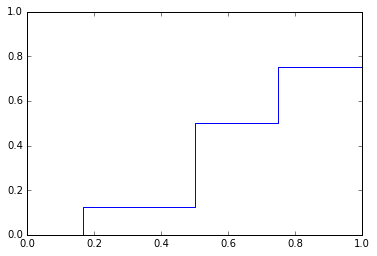

## Ridge Classifier

In [142]:
lr = RidgeClassifier()
params = {'alpha':np.logspace(-3,3,100)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy')

In [143]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [144]:
pred = gs.predict(X_test)

In [145]:
accuracy_score(y_test, pred)

0.75

In [146]:
rc = gs.best_estimator_

[array([ -1.05748377e-02,  -5.78922628e-03,   1.19536415e-02,
          4.18403231e-03,  -7.52910243e-05,  -5.61303431e-03,
         -6.03171109e-03,   5.19654498e-03,  -4.61652291e-03,
         -4.41627687e-03,  -5.15664141e-04,   5.39558288e-04,
         -3.88861987e-04,  -7.65869032e-04,  -3.24441569e-03,
         -1.90500438e-04,  -1.40849416e-02,   5.29607592e-03,
          1.10585658e-02,   5.65964804e-03,   3.60619707e-03,
         -1.76411840e-03,  -2.06707915e-04,   3.99094652e-03,
          1.35179783e-04,   2.98877195e-04,   3.36229637e-03,
          1.51188624e-02,  -2.12073770e-02,  -8.92860123e-03,
         -1.02613264e-02,  -2.90133143e-03,  -7.88505761e-03,
         -6.74740732e-04,  -1.15450917e-03,   4.17542981e-04,
          7.11322366e-03,   1.58985145e-03,   1.59856270e-04,
          1.63887382e-02,  -3.19889386e-03,  -4.23097466e-03,
         -3.99313204e-05,   9.20704104e-03,   7.93901980e-03,
          1.04356413e-03,   1.15188750e-04,   5.26966048e-04,
        

## Logistic L2

In [147]:
lr = LogisticRegression()
params = {'C':np.logspace(-3,3,100)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy')

In [148]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [150]:
pred = gs.predict(X_test)
accuracy_score(y_test, pred)

0.69999999999999996

In [151]:
print pred

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0]


## Logistic L1

In [185]:
lr = LogisticRegression(penalty='l1')
params = {'C':np.logspace(-3,3,100)}
gs = GridSearchCV(lr, param_grid=params, scoring='accuracy')

In [186]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [187]:
pred = gs.predict(X_test)
accuracy_score(y_test, pred)

0.45000000000000001

In [188]:
lrl1 = gs.best_estimator_
lrl1.coef_
X_train.columns[(lrl1.coef_)[0]!=0]

Index([u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS', u'Sixltr', u'Dic',
       u'function.', u'pronoun', u'conj', u'negate', u'verb', u'number',
       u'quant', u'affect', u'anger', u'social', u'cogproc', u'cause',
       u'certain', u'percept', u'drives', u'affiliation', u'reward', u'risk',
       u'focuspresent', u'relativ', u'time', u'work', u'leisure', u'home',
       u'money', u'assent', u'AllPunc', u'Colon', u'QMark', u'Exclam', u'Dash',
       u'Quote', u'Parenth'],
      dtype='object')

In [189]:
accs = []
indices = []

for i in range(100):
    train, test = train_test_split(dataset, train_size=0.80)
    X_train = train.drop('replicate',1)
    y_train = train.replicate
    X_test = test.drop('replicate',1)
    y_test = test.replicate
        
    lr = LogisticRegression(penalty='l1')
    params = {'C':np.logspace(-3,3,100)}
    gs = GridSearchCV(lr, param_grid=params, scoring='accuracy')
    
    gs.fit(X_train, y_train)
    
    pred = gs.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print acc
    accs.append(acc)
    
    indices.append(X_train.columns[(lrl1.coef_)[0]!=0])
    
    

0.6
0.65
0.5
0.55
0.55
0.6
0.65
0.6
0.5
0.6
0.45
0.55
0.55
0.4
0.5
0.5
0.55


KeyboardInterrupt: 

In [200]:
index = set(indices[0])
for i in indices:
    index = index.intersection(set(i))

In [206]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.14976e-03, ...,   8.69749e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [207]:
gs.best_estimator_


LogisticRegression(C=30.538555088334185, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)